In [353]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PowerTransformer
import seaborn as sns

In [245]:
df=pd.read_csv('data.csv')

In [246]:
df.dtypes.value_counts()

float64    93
int64       3
dtype: int64

In [233]:
df[df.duplicated()]
# no duplicates

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


In [234]:
df[df.isna().any(axis=1)]
# no null values

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


In [235]:
df['Bankrupt?'].unique()

array([1, 0], dtype=int64)

In [247]:

df.columns=df.columns.str.strip()
df.columns


Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [237]:
df_describe=df.describe()
row = df_describe.iloc[df_describe.index=='max']  
row        

#cols_for_scaling = row[row < 1].index  # filter for values equal to 1 and get columns via index
#cols_for_scaling

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.990000e+09,9.980000e+09,1.0,990000000.0,1.0,1.0,1.0,1.0,1.0,1.0,3.020000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.990000e+09,9.330000e+09,1.0,1.0,2.750000e+09,9.230000e+09,1.0,9.940000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.740000e+09,9.730000e+09,9.990000e+09,9.990000e+09,1.0,8.810000e+09,1.0,9.570000e+09,1.0,1.0,1.0,1.0,8.820000e+09,9.650000e+09,1.0,1.0,1.0,9.910000e+09,1.0,1.0,1.0,9.540000e+09,1.0,1.0,1.0,1.000000e+10,1.000000e+10,1.0,1.000000e+10,1.0,8.320000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.820000e+09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [238]:

df['NetIncomeFlag'].unique()

KeyError: 'NetIncomeFlag'

In [248]:

pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
s = corr.unstack()
so = s.sort_values(kind='quicksort')
print(so)
df = df.drop(columns=['Debt ratio %'])


Net worth/Assets             Debt ratio %                                         -1.000000
Debt ratio %                 Net worth/Assets                                     -1.000000
Net worth/Assets             Current Liability to Assets                          -0.842583
Current Liability to Assets  Net worth/Assets                                     -0.842583
Borrowing dependency         Net Income to Stockholder's Equity                   -0.806478
                                                                                     ...   
Net Income Flag              Degree of Financial Leverage (DFL)                         NaN
                             Interest Coverage Ratio (Interest expense to EBIT)         NaN
                             Net Income Flag                                            NaN
                             Equity to Liability                                        NaN
Equity to Liability          Net Income Flag                                    

<AxesSubplot: >

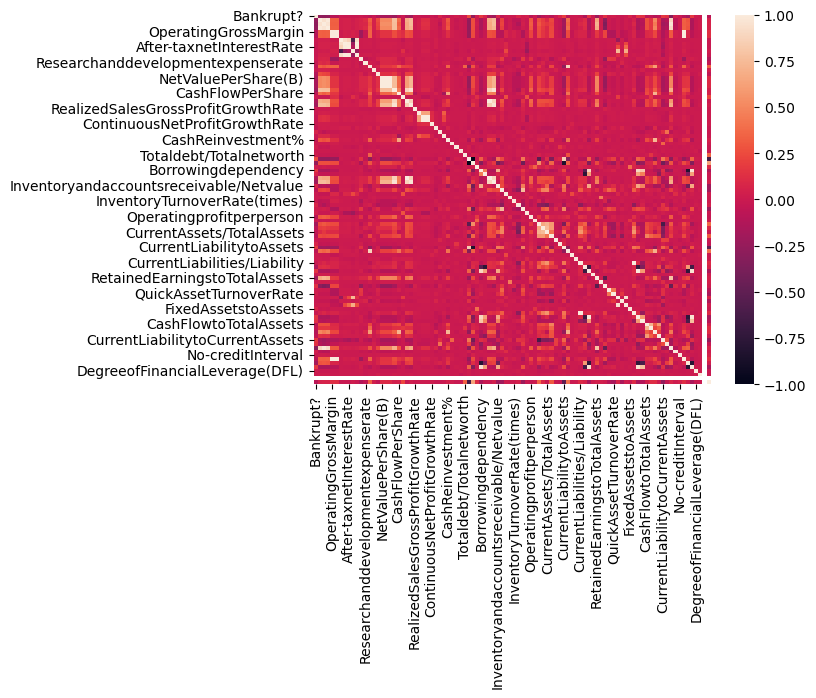

In [44]:
sns.heatmap(corr)

In [249]:
#Check low variance

low_variance = []
for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)
print(low_variance)


['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']


In [250]:
df["Liability-Assets Flag"].value_counts()
df["Net Income Flag"].value_counts() 
df.drop(["Liability-Assets Flag","Net Income Flag"],axis=1,inplace=True)

In [251]:
smote=SMOTE()

y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

In [319]:

X_train, X_test, y_train, y_test=train_test_split(X_sm,y_sm, test_size=0.2, random_state=42)
y_test.shape

(2640,)

In [320]:
# Scale the data and transform to normla distribution with Power transformer as not all variables are normally distributed
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
trans=PowerTransformer()
trans.fit(X_train_scaled)
X_train_scaled=trans.transform(X_train_scaled)
X_test_scaled=trans.transform(X_test_scaled)




In [321]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91
0,-0.006207,0.144521,0.028381,-0.281781,-0.282935,0.225562,0.053998,0.055023,0.038892,0.050557,-0.037960,0.454853,-0.381755,-0.162947,-0.768874,-0.039920,-0.039369,-0.043684,0.159373,-0.948845,-0.019475,0.163276,0.159571,-0.057558,0.063707,0.075072,0.074013,0.038218,0.055133,-0.035111,0.039462,-0.677238,-0.009763,-0.058493,0.337462,-0.059302,-0.661948,-0.219905,0.017923,-0.409904,0.165571,0.154366,0.461602,-0.348968,-0.06089,-0.066079,0.619001,-0.609932,0.208816,-0.046725,0.209898,-0.060101,0.302708,-0.438756,1.298037,-1.146747,-0.016861,-0.232296,1.142359,-0.444404,0.183031,-0.129779,0.936350,0.293272,0.140389,-0.111241,0.155655,-0.014560,-1.303246,-0.496184,-0.759223,-0.000588,-0.662114,-0.001435,-0.054268,0.936350,0.140389,-0.280423,-0.054719,-0.011293,-1.091050,0.012630,-0.005864,0.131759,-0.091152,-0.285593,-0.281829,0.101442,0.079520,3.200591,0.388230,-0.780878
1,-1.199227,-1.133831,-1.271009,0.909199,0.909928,-2.256592,-0.099851,-0.105023,0.095160,-0.118839,-0.658585,0.153025,-6.412157,-0.162947,-0.768874,-0.804064,-0.792119,-0.795205,-0.354425,-0.675713,-0.019491,-0.963378,-0.256970,0.556433,0.044253,0.098452,0.095703,0.042501,-0.359264,-0.035111,-0.058551,-0.926775,-0.009346,-0.058493,-0.021687,-0.059303,1.523055,0.701800,-0.254939,-0.473130,-0.986430,-0.284342,-0.256753,-0.773648,-0.06089,-0.066079,1.619746,-0.609932,-1.129294,-0.046725,-0.428938,-0.060101,1.736592,1.462809,0.943732,1.621155,-0.016842,-0.232296,-1.263694,-8.128134,-0.028461,-0.129779,0.521919,0.369167,-0.216348,-0.111241,-1.262189,-0.660094,1.412120,-0.496184,-0.759223,0.031185,-1.056167,-0.054993,-0.054267,0.521919,-0.216348,-0.390332,-4.407127,-7.667099,-2.709914,-1.138137,-1.515380,-1.116071,-0.091152,-0.002165,0.909193,-0.063143,-0.259416,-0.127143,-0.029380,2.042094
2,0.193636,0.349379,0.236300,-0.498839,-0.499401,0.106867,0.057945,0.061237,0.050865,0.055201,1.296834,0.440283,-0.382845,-0.162947,1.174523,-0.901574,-0.887922,-0.890779,0.357408,-1.142776,-0.019396,0.189906,0.324710,-0.003023,0.159284,0.153319,0.154848,0.049346,2.740566,-0.035111,0.066819,-1.857664,-0.009774,-0.058493,0.085301,-0.059302,-1.332658,0.596694,0.191785,1.970591,0.192891,0.328563,1.364297,2.288483,-0.06089,-0.066079,-0.804429,-0.609932,2.312159,-0.046720,0.456971,-0.060101,-0.160236,2.284411,1.628883,-0.754026,-0.016860,-0.232296,1.939845,-0.465417,-0.059992,7.732600,1.555392,0.156463,0.569347,9.018190,-0.256633,0.314407,-0.800576,2.179149,1.532630,-0.008806,-0.596803,-0.001632,-0.054268,1.555392,0.569347,-0.501741,-0.442039,-0.076129,-1.343504,-0.382075,0.307625,0.343322,-0.091152,0.004845,-0.498624,0.168758,0.438117,0.113225,0.141292,-1.312853
3,0.387190,0.462258,0.427074,-0.418153,-0.419492,-0.166888,0.084928,0.087049,0.103001,0.080679,-0.658585,1.355623,-0.057955,-0.162947,-0.509667,1.880884,1.879956,1.877412,0.621907,-0.045566,-0.019478,-0.276480,0.549007,-0.108912,-0.078129,0.113682,0.110848,0.045789,0.276887,-0.035111,0.039199,0.010460,-0.009683,-0.058493,-0.015801,-0.059303,1.513639,-0.231423,-0.301816,-0.473130,-0.282294,0.565275,-0.343545,-0.749343,-0.06089,-0.066079,1.621227,-0.609932,-1.216318,-0.046725,-0.006478,-0.060101,0.337238,-0.733787,-0.993843,-0.432971,-0.016858,-0.232296,-1.631101,-0.078177,-0.020826,-0.129779,-1.147116,0.061331,-0.255939,-0.111241,2.111949,1.181021,-1.620404,-0.496184,-0.759223,0.002927,1.366753,0.001471,-0.054266,-1.147116,-0.255939,-0.514534,0.300769,0.195961,-0.108005,0.121361,-1.214171,0.575978,-0.091152,0.090605,-0.418066,0.149647,-0.282774,-0.117014,-0.018657,1.617030
4,-0.429609,-0.559143,-0.679211,0.874240,0.874908,-0.646218,0.003439,-0.021433,0.027259,-0.028768,-0.658585,-0.939189,-0.816979,-0.162947,-0.768874,-0.101988,-0.100671,-0.104934,-0.169707,-0.379396,-

In [322]:
lda=LinearDiscriminantAnalysis()

In [323]:
# as only 2 outcomes for target, the transforamtion returns one single columns
lda.fit(X_train_scaled, y_train)
LDA_transformed= lda.transform(pd.DataFrame(X_train_scaled))
y_pred_train=lda.predict(X_train_scaled)


In [324]:
LDA_transformed.shape

(10558, 1)

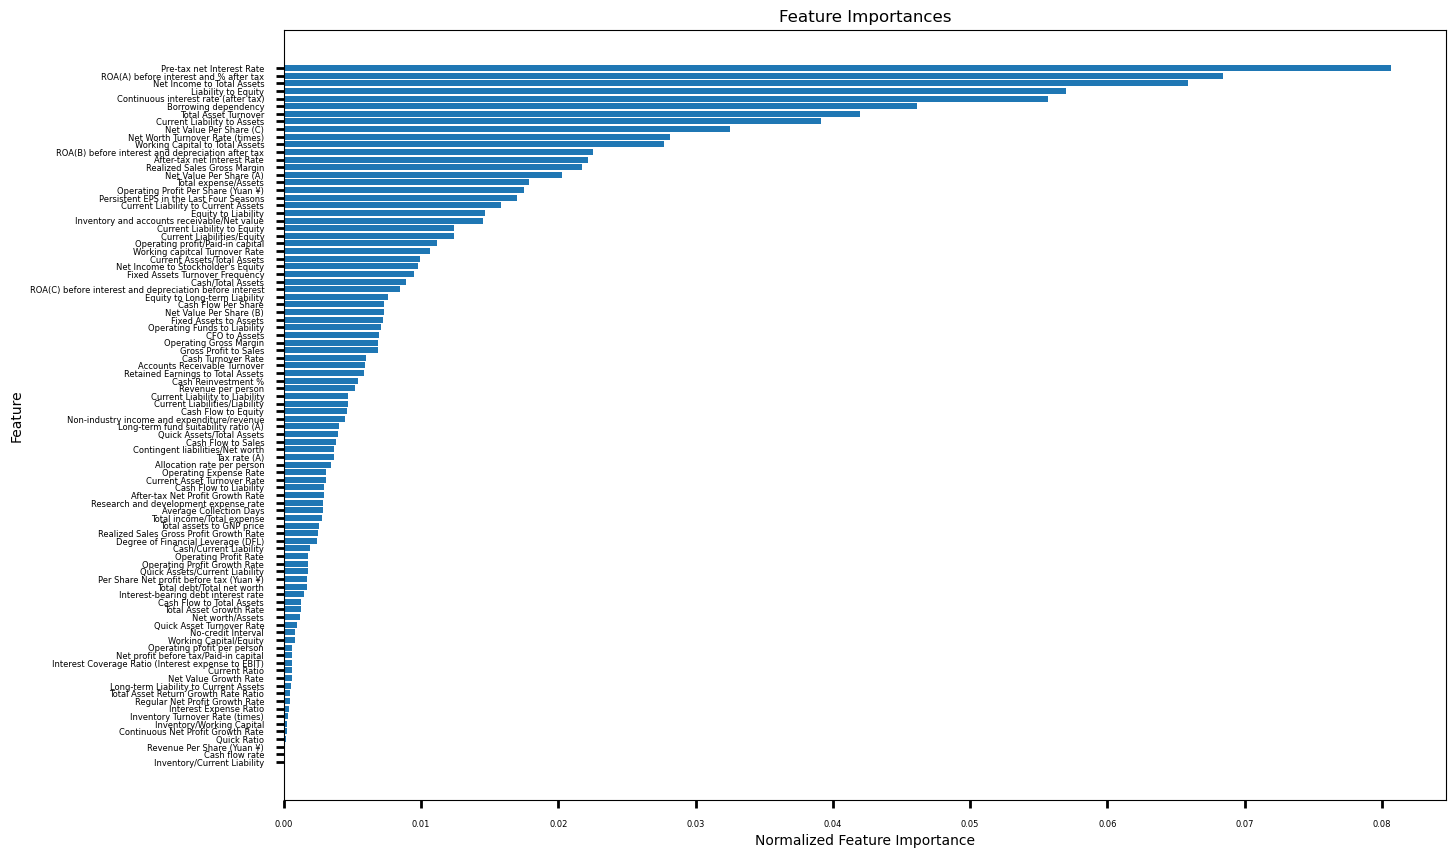

<Figure size 640x480 with 0 Axes>

In [330]:
def plot_feature_importances(model, X_train):
    # Get absolute value of coefficients
    coefs = np.abs(model.coef_)
    
    # Normalize coefficients
    coefs /= np.sum(coefs)
    
    # Sort coefficients by importance
    sorted_idx = np.argsort(coefs)[0]
    
    # Get feature names
    feature_names = X_train.columns.values
    
    plt.figure(figsize=(15, 10))
    # Plot horizontal bar chart of feature importances
    plt.barh(range(len(sorted_idx)), coefs[0][sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
    # set the tick label font size and other parameters
    plt.tick_params(axis='both', which='major', labelsize=6, length=6, width=2, direction='out', pad=8)

    plt.xlabel('Normalized Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()
    plt.savefig('feature_importance.jpg')
plot_feature_importances(lda, X_train)

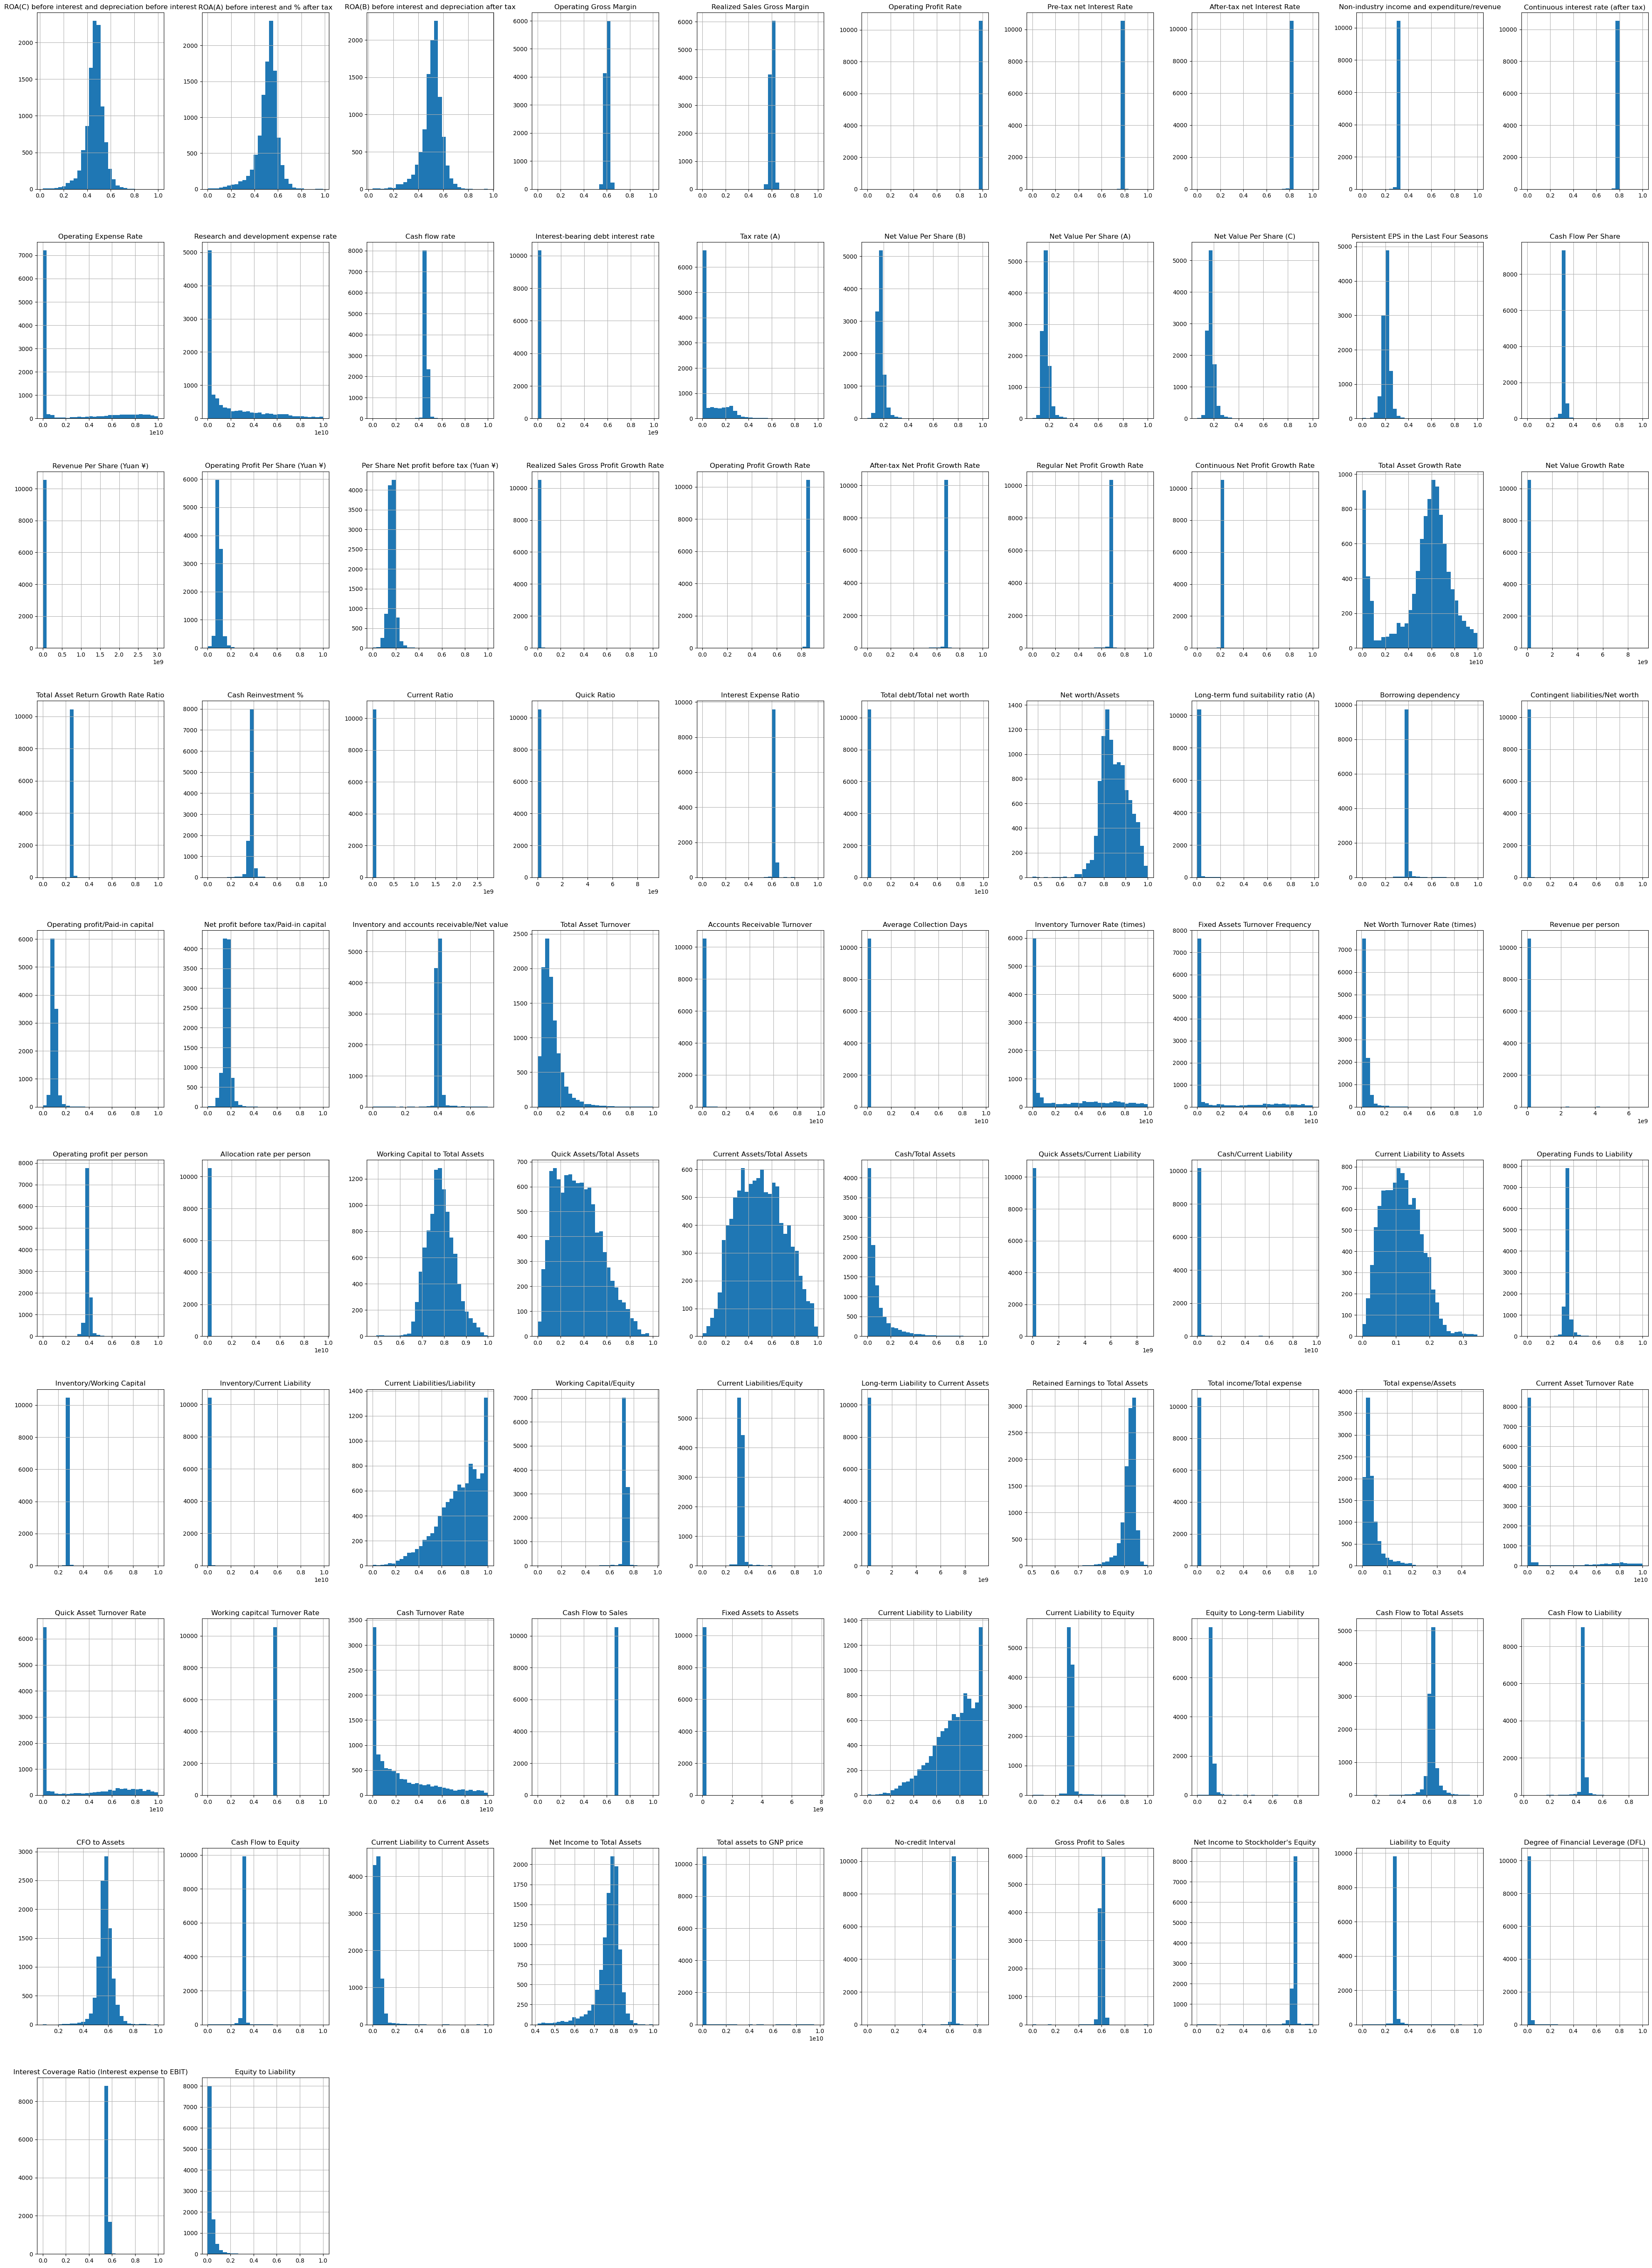

In [326]:
X_train.hist(bins=30, figsize=(50,70))
plt.savefig('variable distribution.png')

In [379]:


def feature_iteration(X_train,X_test, y_train, y_test, coefs):
    best_params =  {'n_components':1, 'solver':'svd', 'store_covariance':True, 'tol':1e-05}

    features_df= pd.DataFrame(coefs, index=X.columns.tolist())
    
    performance_log_n = {'Error_metric': ['Accuracy','Precision','Recall']}

    for n in range(30,31):
    # for n in range(10,len(coefs),10):
        # define n features
        features=features_df.nlargest(n,[0]).index.to_list()
        X_train_n=X_train[features]
        X_test_n=X_test[features]

        #Scale and fit data
        scaler= StandardScaler()
        scaler.fit(X_train_n)
        X_train_scaled=scaler.transform(X_train_n)
        X_test_scaled=scaler.transform(X_test_n)

        #Model
        lda=LinearDiscriminantAnalysis(**best_params)
        # as only 2 outcomes for target, the transforamtion returns one single columns
        lda.fit(X_train_scaled, y_train)

        y_pred_train=lda.predict(X_train_scaled)
        y_pred_test=lda.predict(X_test_scaled)

        performance_log_n['Test_'+str(n)]=[accuracy_score(y_test, y_pred_test),
                                                precision_score(y_test, y_pred_test),
                                                recall_score(y_test, y_pred_test)]
                                    
        

        #print(f'no. of features {n} {performance_log_n}')
    return pd.DataFrame(performance_log_n)

df_by_features=feature_iteration(X_train,X_test, y_train, y_test, coefs[0])

In [366]:


def hyperparams(X_train,X_test, y_train, y_test, coefs, list_features):
    
    features_df= pd.DataFrame(coefs, index=X.columns.tolist())
    
    performance_log_n = {'Error_metric': ['Accuracy','Precision','Recall']}

    for n in list_features:
        # define n features
        features=features_df.nlargest(n,[0]).index.to_list()
        X_train_n=X_train[features]
        X_test_n=X_test[features]

        #Scale and fit data
        scaler= StandardScaler()
        scaler.fit(X_train_n)
        X_train_scaled=scaler.transform(X_train_n)
        X_test_scaled=scaler.transform(X_test_n)

        #Model
        lda=LinearDiscriminantAnalysis()
        # as only 2 outcomes for target, the transforamtion returns one single columns
        # Define the hyperparameter grid to search over
        param_grid = {'solver': ['svd', 'lsqr'],
                    #'shrinkage': ['None'],
                    'n_components': [1],
                    'store_covariance': [True, False],
                    'tol': [1e-4, 1e-5, 1e-6]}

        # Perform the grid search
        scoring = {'accuracy': 'accuracy',
           'precision_macro': 'precision_macro',
           'recall_macro': 'recall_macro'}
        grid_search = GridSearchCV(lda, param_grid=param_grid, cv=5, scoring=scoring, refit=False, verbose=2)
        grid_search.fit(X_train_scaled, y_train)
        # print('Best hyperparameters:', grid_search.best_params_)
        # print('Best cross-validation score:', grid_search.best_score_)
        
        print(grid_search.cv_results_)
        results = grid_search.cv_results_
        for i in range(len(results['params'])):
            print(f"Model {i+1}: n_components={results['params'][i]['n_components']}, \
                Accuracy={results['mean_test_accuracy'][i]:.3f}, \
                Precision={results['mean_test_precision_macro'][i]:.3f}, \
                Recall={results['mean_test_recall_macro'][i]:.3f}")

        # Print the best hyperparameters and the corresponding mean cross-validation score
        #lda.fit(X_train_scaled, y_train)


     #   performance_log_n['Test_'+str(n)]=[accuracy_score(y_test, y_pred_test),
      #                                          precision_score(y_test, y_pred_test),
       #                                         recall_score(y_test, y_pred_test)]
                                    
        

        #print(f'no. of features {n} {performance_log_n}')
    #return pd.DataFrame(performance_log_n)
    # 

df_by_features=hyperparams(X_train,X_test, y_train, y_test, coefs[0],[30,70])
# results: multiple models of equal ranking, thus no best params, chosen 70 features, model 3,
# best_params =  [n_components=1, solver=svd, store_covariance=True, tol=1e-05]


SyntaxError: invalid syntax (60195271.py, line 62)

In [380]:
df_by_features

,Error_metric,Test_30
0,Accuracy,0.889394
1,Precision,0.872794
2,Recall,0.908882


In [ ]:
df_by_features.set_index('Error_metric',inplace=True)

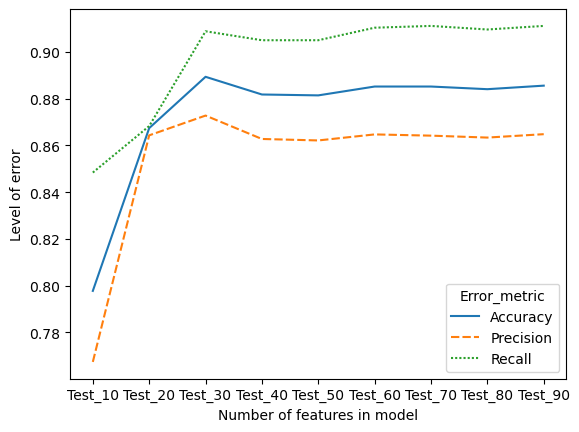

In [369]:
sns.lineplot(data=df_by_features.transpose() )
plt.xlabel('Number of features in model')
plt.ylabel('Level of error')
plt.savefig('error_metrics.jpg')

Confusion matrix for 30 features


c:\Users\gemma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\gemma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


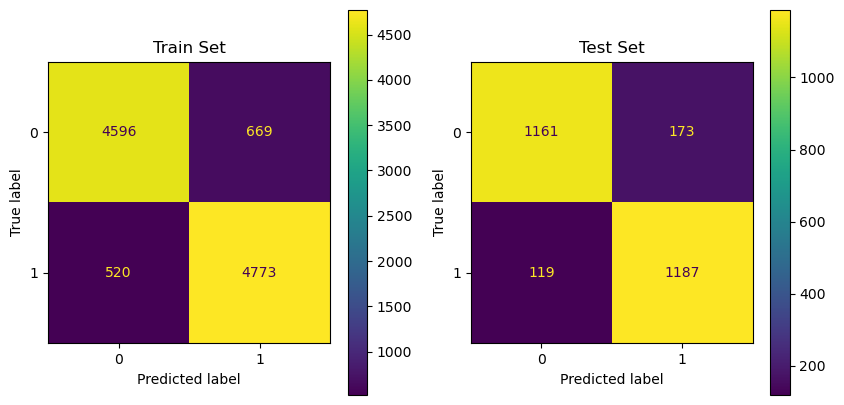

Confusion matrix for 70 features


c:\Users\gemma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\gemma\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

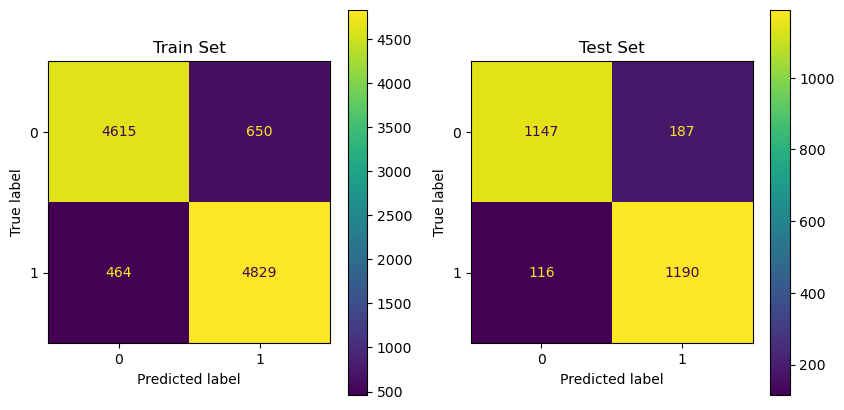

<Figure size 640x480 with 0 Axes>

In [371]:
# plot confusion matrix


def feature_choice(X_train,X_test, y_train, y_test, coefs, list_feature_numbers):
    
    best_params =  {'n_components':1, 'solver':'svd', 'store_covariance':True, 'tol':1e-05}
    features_df= pd.DataFrame(coefs, index=X.columns.tolist())
    
    performance_log_n = {'Error_metric': ['Accuracy','Precision','Recall']}

    for n in list_feature_numbers:
        # define n features
        features=features_df.nlargest(n,[0]).index.to_list()
        X_train_n=X_train[features]
        X_test_n=X_test[features]

        #Scale and fit data
        scaler= StandardScaler()
        scaler.fit(X_train_n)
        X_train_scaled=scaler.transform(X_train_n)
        X_test_scaled=scaler.transform(X_test_n)

        #Model
        lda=LinearDiscriminantAnalysis(**best_params)
        # as only 2 outcomes for target, the transforamtion returns one single columns
        lda.fit(X_train_scaled, y_train)

        y_pred_train=lda.predict(X_train_scaled)
        y_pred_test=lda.predict(X_test_scaled)
        fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
        print(f"Confusion matrix for {n} features")
        plot_confusion_matrix(lda,X_train_scaled,y_train,ax=ax1, values_format = 'd')
        ax1.title.set_text("Train Set")
        plot_confusion_matrix(lda,X_test_scaled,y_test,ax=ax2,values_format = 'd')
        ax2.title.set_text("Test Set")
        plt.show()
        plt.savefig(f'Confusion matrix for {n} features.jpg')
                                    
        

        #print(f'no. of features {n} {performance_log_n}')
    
list_features=[30,70]
feature_choice(X_train,X_test, y_train, y_test, coefs[0], list_features)




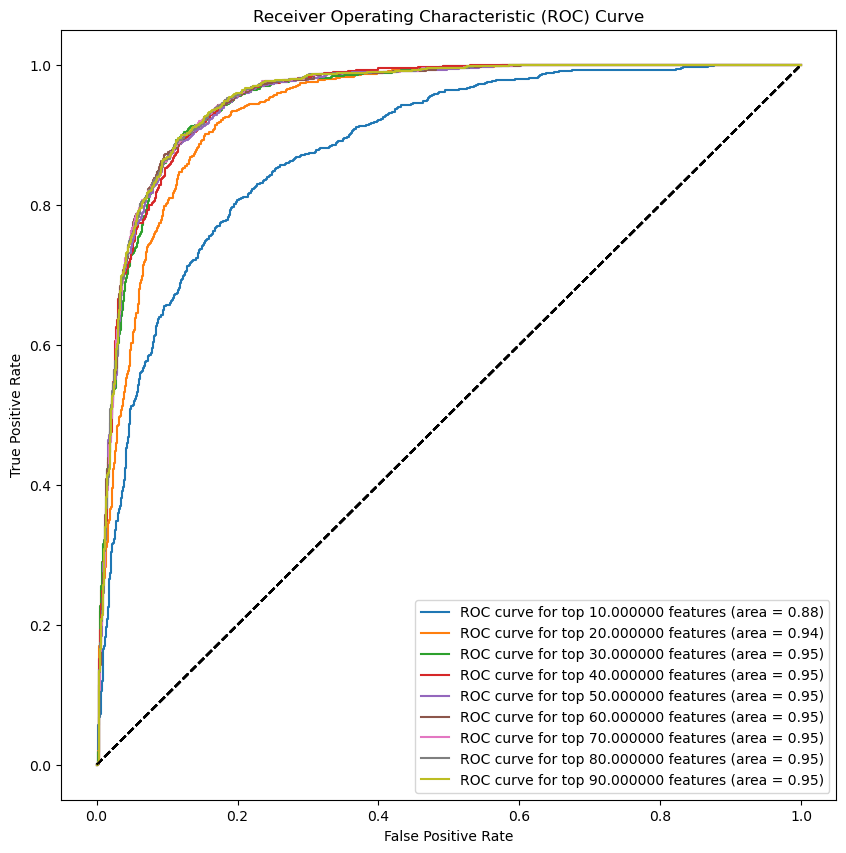

In [372]:
# ROC curve
def feature_roc(X_train,X_test, y_train, y_test, coefs):
    features_df = pd.DataFrame(coefs, index=X.columns.tolist())
    best_params =  {'n_components':1, 'solver':'svd', 'store_covariance':True, 'tol':1e-05}
    plt.figure(figsize=(10, 10))
    for n in range(10,len(coefs),10):
        # define n features
        features=features_df.nlargest(n,[0]).index.to_list()
        X_train_n=X_train[features]
        X_test_n=X_test[features]
        #Scale and fit data
        scaler= StandardScaler()
        scaler.fit(X_train_n)
        X_train_scale=scaler.transform(X_train_n)
        X_test_scale=scaler.transform(X_test_n)
        #Model
        lda=LinearDiscriminantAnalysis(**best_params)
    
        lda.fit(X_train_scale, y_train)
        # Plot roc curves
        probs_lda = lda.predict_proba(X_test_scale)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, probs_lda)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='ROC curve for top %f features (area = %0.2f)' %(n, roc_auc))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.savefig('roc_curve.jpg')
    return plt.show()
feature_roc(X_train,X_test, y_train, y_test, coefs[0])

In [308]:
plt.savefig('roc_curve.jpg')

<Figure size 640x480 with 0 Axes>